In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as img
from sklearn.model_selection import train_test_split


In [62]:
dataset=pd.read_csv('/content/data.csv')
print(dataset)
del dataset['Unnamed: 32']
print(dataset)
print(dataset.shape)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [63]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
x=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [64]:
x[10]

array([1.602e+01, 2.324e+01, 1.027e+02, 7.978e+02, 8.206e-02, 6.669e-02,
       3.299e-02, 3.323e-02, 1.528e-01, 5.697e-02, 3.795e-01, 1.187e+00,
       2.466e+00, 4.051e+01, 4.029e-03, 9.269e-03, 1.101e-02, 7.591e-03,
       1.460e-02, 3.042e-03, 1.919e+01, 3.388e+01, 1.238e+02, 1.150e+03,
       1.181e-01, 1.551e-01, 1.459e-01, 9.975e-02, 2.948e-01, 8.452e-02])

In [65]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [76]:
 # Usage in a Keras layer:
ker_initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)
layer = tf.keras.layers.Dense(3, kernel_initializer=ker_initializer)

In [12]:
# #sequential model
# from keras.models import Sequential
# from keras.layers import Dense
# model_ann1=Sequential()
# model_ann1.add(Dense(units=16,kernel_initializer='uniform',activation='relu',input_dim=30))
# model_ann1.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
# # model_ann1.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
# model_ann1.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
# model_ann1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
## Creting model for binary classification task
model = Sequential()
weight_initializer = tf.keras.initializers.he_uniform()
bias_initializer = tf.keras.initializers.he_uniform()
model.add(Dense(4, input_dim = 30, kernel_initializer=weight_initializer, activation="tanh", use_bias=True,bias_initializer=bias_initializer))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 4)                   │             124 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [78]:
print("Weights and biases of the layers before training the model: \n")
for layer in model.layers:
  print(layer.name)
  print("Weights")
  print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("Bias")
  print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

Weights and biases of the layers before training the model: 

dense_12
Weights
Shape:  (30, 4) 
 [[-0.35669896 -0.36313885 -0.05766419 -0.31796086]
 [-0.08322507  0.24119359  0.39612585 -0.05138245]
 [-0.33030632 -0.1702033  -0.29387587  0.10032701]
 [-0.38994625  0.30798244  0.37213928  0.23589694]
 [-0.13281631  0.10287201  0.11847901 -0.22881591]
 [ 0.10878092  0.13060069  0.37816578 -0.25499073]
 [ 0.16732544  0.10080409  0.16118675 -0.11928573]
 [-0.19262856  0.19572544 -0.1493066   0.21585363]
 [-0.03150707  0.34466898  0.43753594  0.35953313]
 [-0.1679548   0.05306584 -0.20268598 -0.18740654]
 [-0.31150937  0.33260447  0.06151479  0.28773296]
 [-0.2852698  -0.33554837 -0.44394675 -0.03128126]
 [-0.42881936 -0.3337202   0.24463564  0.22154182]
 [ 0.11368746 -0.04480949  0.20518428  0.07770729]
 [ 0.2254222  -0.18871632  0.16079599 -0.19573689]
 [-0.23921965 -0.36161795 -0.39258382  0.43457437]
 [ 0.04907551  0.02333328 -0.08825803  0.1890316 ]
 [ 0.11454087 -0.13026524 -0.3248727

In [79]:
#functional model
from keras.models import Model
from keras.layers import Input
inp = Input(shape=(30,))
bias_initializer = tf.keras.initializers.he_uniform()
# x = Flatten()(inp)      ## if input data is in the 2d matrix form( i.e. image data)
x1 = Dense(16, kernel_initializer='he_uniform', activation="tanh",use_bias=True,bias_initializer=bias_initializer,name = 'layer_1')(inp)
x2 = Dense(32, kernel_initializer='he_uniform', activation="tanh",use_bias=True,bias_initializer="zero",name = 'layer_2')(x1)
out = Dense(1, kernel_initializer='he_uniform', activation="sigmoid")(x2)
# model_ann2 = Model(inp, out)
model = Model(inputs=inp, outputs=out)
model.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_1 (Dense)                      │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_2 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
from tensorflow.python.framework.tensor_spec import DenseSpec
inp = Input(shape=(30,))
bias_initializer = tf.keras.initializers.he_uniform()
x1 = Dense(16, kernel_initializer='he_uniform', activation = "tanh", use_bias=True, bias_initializer=bias_initializer, name='layer1')(inp)
x2 = Dense(32, kernel_initializer='he_uniform', activation="tanh", use_bias=True, bias_initializer="zero", name='layer2')(x1)
out = Dense(1, kernel_initializer='he_uniform', activation="sigmoid")(x2)

model2 = Model(inputs=inp, outputs=out)
model2.summary()

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

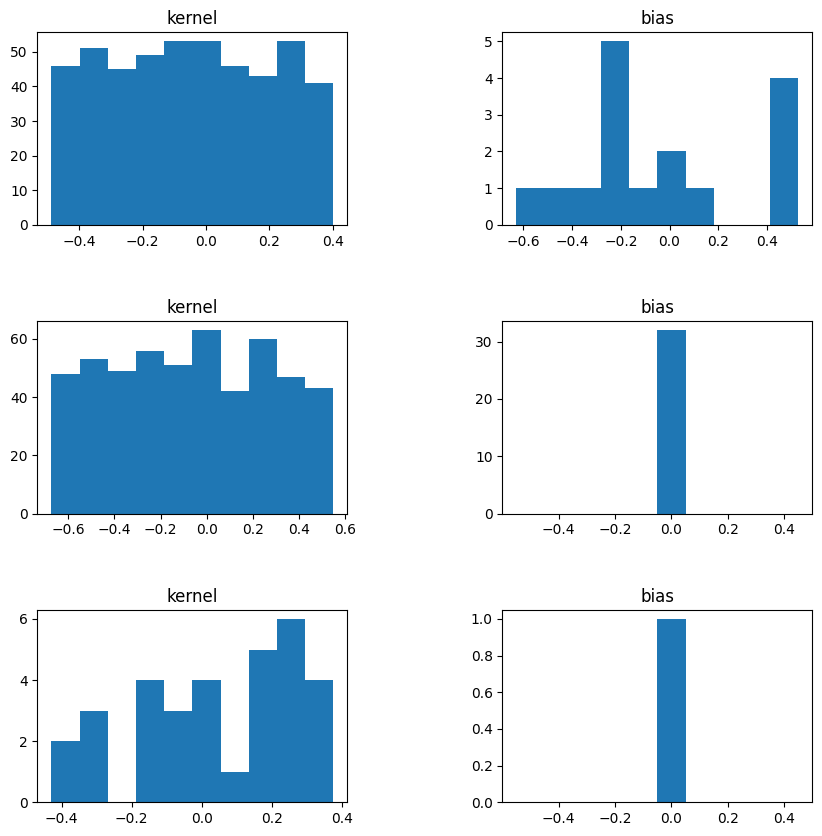

In [81]:
# Plot histograms of weight and bias values

fig, axes = plt.subplots(3, 2, figsize=(10,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in model.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

In [59]:
model_ann1.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
# model_ann2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history_ann=model_ann1.fit(x_train,y_train,batch_size=4,epochs=100,validation_data=(x_test,y_test),verbose=1)

Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9895 - loss: 0.0239 - val_accuracy: 0.9737 - val_loss: 0.0814
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9737 - val_loss: 0.0813
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - loss: 0.0183 - val_accuracy: 0.9737 - val_loss: 0.0816
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0114 - val_accuracy: 0.9737 - val_loss: 0.0817
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9897 - loss: 0.0199 - val_accuracy: 0.9737 - val_loss: 0.0807
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9945 - loss: 0.0164 - val_accuracy: 0.9737 - val_loss: 0.0815
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0328 - val_accuracy: 0.9737 - val_loss: 0.0803
Epoch 8/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9881 - loss: 0.0232 - val_accu

Text(0, 0.5, 'accuracy')

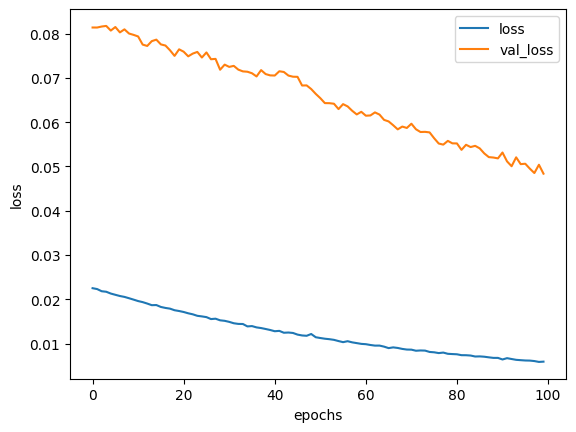

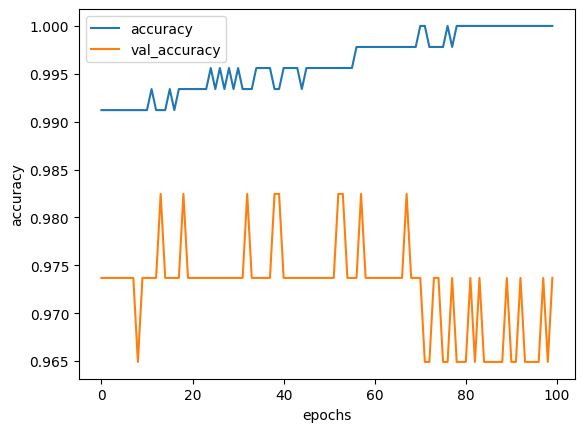

In [60]:
#plotting
f,ax=plt.subplots()
ax.plot(history_ann.history['loss'],label='loss')
ax.plot(history_ann.history['val_loss'],label='val_loss')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')

f,ax=plt.subplots()
ax.plot(history_ann.history['accuracy'],label='accuracy')
ax.plot(history_ann.history['val_accuracy'],label='val_accuracy')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')


In [54]:
score=model_ann1.evaluate(x_test,y_test,verbose=1)
print('testloss',score[0])
print('accuracy',score[1])
#

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9874 - loss: 0.0525 
testloss 0.08139718323945999
accuracy 0.9736841917037964


In [55]:
#model predictiion
y_pred=model_ann1.predict(x_test)
y_pred=np.where(y_pred>0.5,0,1)
print(y_pred)
print(y_pred.shape)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]]
(114, 1)


In [56]:
#performance evalation
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('performance Matrix')
matrsx=classification_report(y_test,y_pred)
print(matrsx)
print('confusion matrix')
cm=confusion_matrix(y_test,y_pred)
print(cm)

#

performance Matrix
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.04      0.06      0.05        47

    accuracy                           0.03       114
   macro avg       0.02      0.03      0.03       114
weighted avg       0.02      0.03      0.02       114

confusion matrix
[[ 0 67]
 [44  3]]


In [45]:
from sklearn.neural_network import MLPClassifier

mlp_clf=MLPClassifier(hidden_layer_sizes=(16,32),max_iter=10,activation='tanh',solver='sgd')
mlp_clf.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(16, 32), max_iter=10,
              solver='sgd')

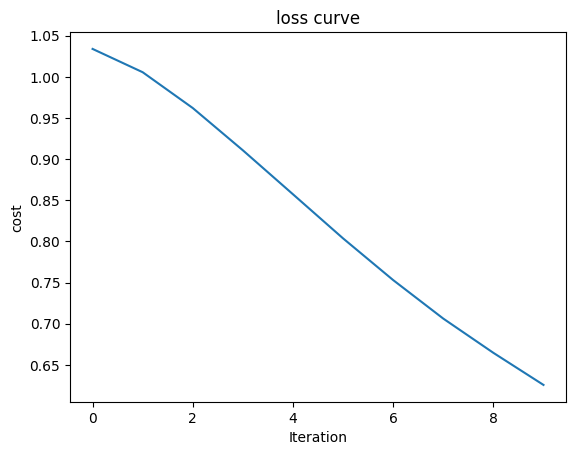

In [46]:
plt.plot(mlp_clf.loss_curve_)
plt.title('loss curve')
plt.xlabel('Iteration')
plt.ylabel('cost')
plt.show()

In [47]:
y_pred_sk=mlp_clf.predict(x_test)
print(y_pred_sk)

[0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1]


In [48]:
y_test


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [49]:
calculation=pd.DataFrame(np.c_[y_test,y_pred_sk],columns=['original','predicted'])
print(calculation)

     original  predicted
0           1          0
1           0          0
2           0          0
3           0          0
4           0          0
..        ...        ...
109         1          0
110         0          0
111         1          0
112         1          0
113         0          1

[114 rows x 2 columns]


In [50]:
#confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('performance Matrix')
matrsx=classification_report(y_test,y_pred_sk)
print(matrsx)
print('confusion matrix')
cm=confusion_matrix(y_test,y_pred_sk)
print(cm)

performance Matrix
              precision    recall  f1-score   support

           0       0.63      0.88      0.73        67
           1       0.60      0.26      0.36        47

    accuracy                           0.62       114
   macro avg       0.61      0.57      0.55       114
weighted avg       0.62      0.62      0.58       114

confusion matrix
[[59  8]
 [35 12]]


In [51]:
#comparing all
calculation3=pd.DataFrame(np.c_[y_test,y_pred,y_pred_sk],columns=['original','ann','sklearn'])
print(calculation3)

     original  ann  sklearn
0           1    1        0
1           0    1        0
2           0    1        0
3           0    1        0
4           0    1        0
..        ...  ...      ...
109         1    1        0
110         0    1        0
111         1    1        0
112         1    1        0
113         0    1        1

[114 rows x 3 columns]
